# Introduction
#Customer segmentation is essential for modern businesses to understand their diverse customer base. By analyzing shopping mall customer data, we can uncover hidden patterns in purchasing behavior. This project applies machine learning to categorize customers into meaningful groups. These insights help businesses create targeted marketing strategies.

# Problem Statement
#Malls struggle to understand customer preferences due to diverse shopping behaviors. Traditional approaches fail to identify distinct customer segments for personalized marketing. This project solves this by using clustering algorithms to automatically group similar customers.

# Import all Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("C:\\UMAR DATA\\Data Sciences\\Intership\\Developer Hub\\Phase 2\\Task 5\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Basic Data Understanding

In [3]:
df=df.drop(['CustomerID'],axis='columns')
print(f'Shape of the Dataset:{df.shape}\n')
print(f'Null Values in Dataset:\n{df.isnull().sum()}\n')
print(f'Duplicated Values in Dataset:{df.duplicated().sum()}\n')
print(f'Drop Duplicated Values:{df.drop_duplicates(inplace=True)}\n')
print(f'Basic Information about Dataset:{df.info()}')

Shape of the Dataset:(200, 4)

Null Values in Dataset:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicated Values in Dataset:0

Drop Duplicated Values:None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
Basic Information about Dataset:None


In [4]:
df_cate=df.select_dtypes(include='object')
df_category=df_cate.columns
print(f'Total Numbers of Categorical variable is {len(df_category)}')
df_num=df.select_dtypes(include='number')
df_number=df_num.columns
print(f'Total Number of Numerical data is {len(df_number)}')

Total Numbers of Categorical variable is 1
Total Number of Numerical data is 3


In [5]:
print(f'Basic Summary of Numerical Features:\n{df.describe()}')

Basic Summary of Numerical Features:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


In [6]:
print(f"Basic Summary of Categorical Features:\n{df.describe(include='object')}")

Basic Summary of Categorical Features:
        Gender
count      200
unique       2
top     Female
freq       112


# Feature Engineering

In [7]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),age_category
0,Male,19,15,39,Young Adult
1,Male,21,15,81,Young Adult
2,Female,20,16,6,Young Adult
3,Female,23,16,77,Young Adult
4,Female,31,17,40,Adult


In [8]:
income_bins = [0, 40, 80, 120, 160]
income_labels = ['Low Income', 'Medium Income', 'High Income', 'Very High Income']
df['Income_Category'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels)
spending_bins = [0, 30, 60, 80, 100]
spending_labels = ['Low Spender', 'Moderate Spender', 'High Spender', 'Very High Spender']
df['Spending_Category'] = pd.cut(df['Spending Score (1-100)'], bins=spending_bins, labels=spending_labels)

# Exploratory Data Analysis

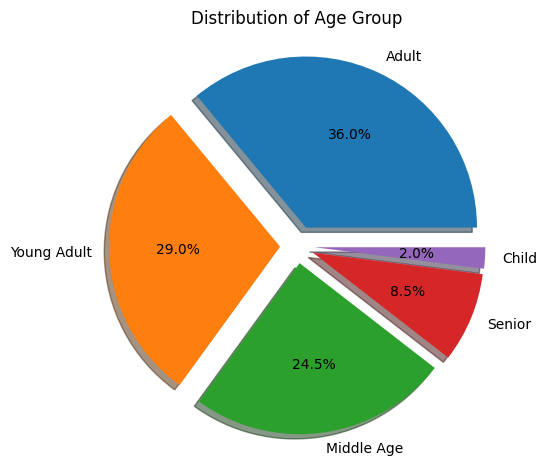

In [9]:
count=df.age_category.value_counts()
index=np.argmax(count)
explode=[0.12 if i == index else 0.1 for i in range(len(count))]
plt.pie(count,labels=count.index,explode=explode,autopct='%1.1f%%',shadow=True)
plt.title("Distribution of Age Group")
plt.tight_layout()
plt.savefig("C:\\UMAR DATA\\Data Sciences\\Intership\\Developer Hub\\Phase 2\\Task 5\\Distribution of Age Group.png", 
            dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

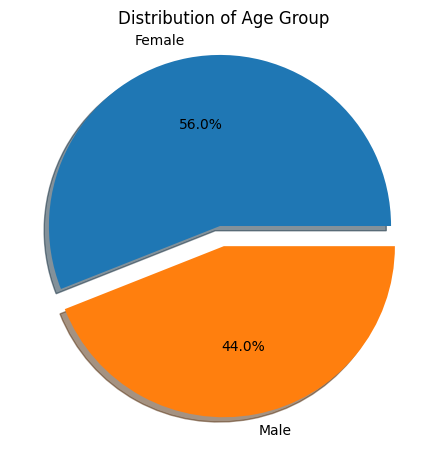

In [10]:
count=df.Gender.value_counts()
index=np.argmax(count)
explode=[0.12 if i == index else 0 for i in range(len(count))]
plt.pie(count,labels=count.index,explode=explode,autopct='%1.1f%%',shadow=True)
plt.title("Distribution of Age Group")
plt.tight_layout()
plt.savefig("C:\\UMAR DATA\\Data Sciences\\Intership\\Developer Hub\\Phase 2\\Task 5\\Distribution of Gender.png", 
            dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

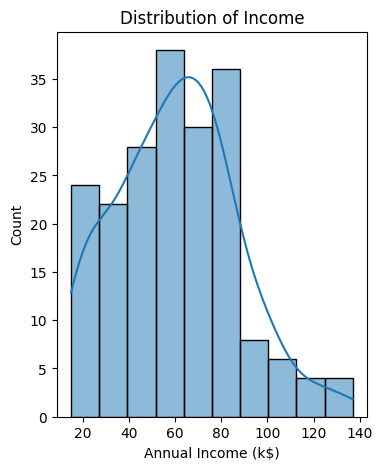

In [11]:
plt.figure(figsize=(4,5))
sns.histplot(data=df,x='Annual Income (k$)',kde=True)
plt.title("Distribution of Income")
plt.savefig("C:\\UMAR DATA\\Data Sciences\\Intership\\Developer Hub\\Phase 2\\Task 5\\Distribution of Income.png", 
            dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

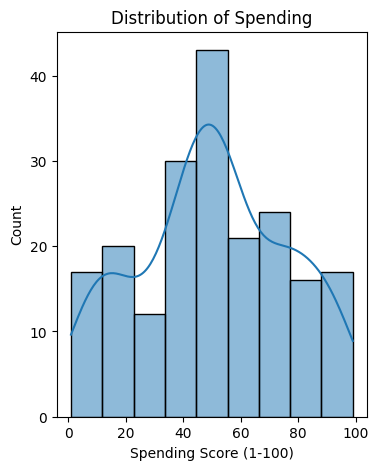

In [12]:
plt.figure(figsize=(4,5))
sns.histplot(data=df,x='Spending Score (1-100)',kde=True)
plt.title("Distribution of Spending")
plt.savefig("C:\\UMAR DATA\\Data Sciences\\Intership\\Developer Hub\\Phase 2\\Task 5\\Distribution of Spending.png", 
            dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

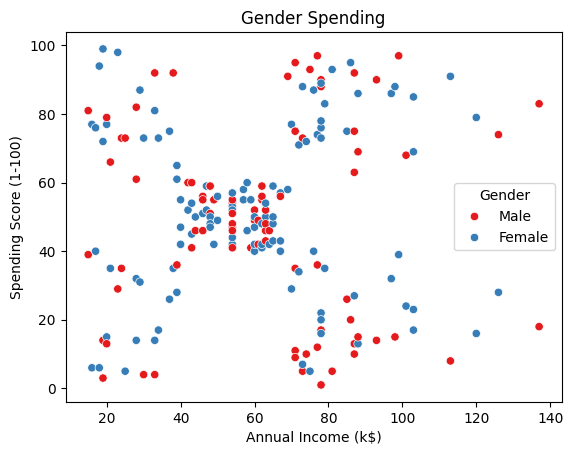

In [13]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',
                hue='Gender',palette='Set1')
plt.title("Gender Spending")
plt.savefig("C:\\UMAR DATA\\Data Sciences\\Intership\\Developer Hub\\Phase 2\\Task 5\\Distribution of Gender_spending.png", 
            dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

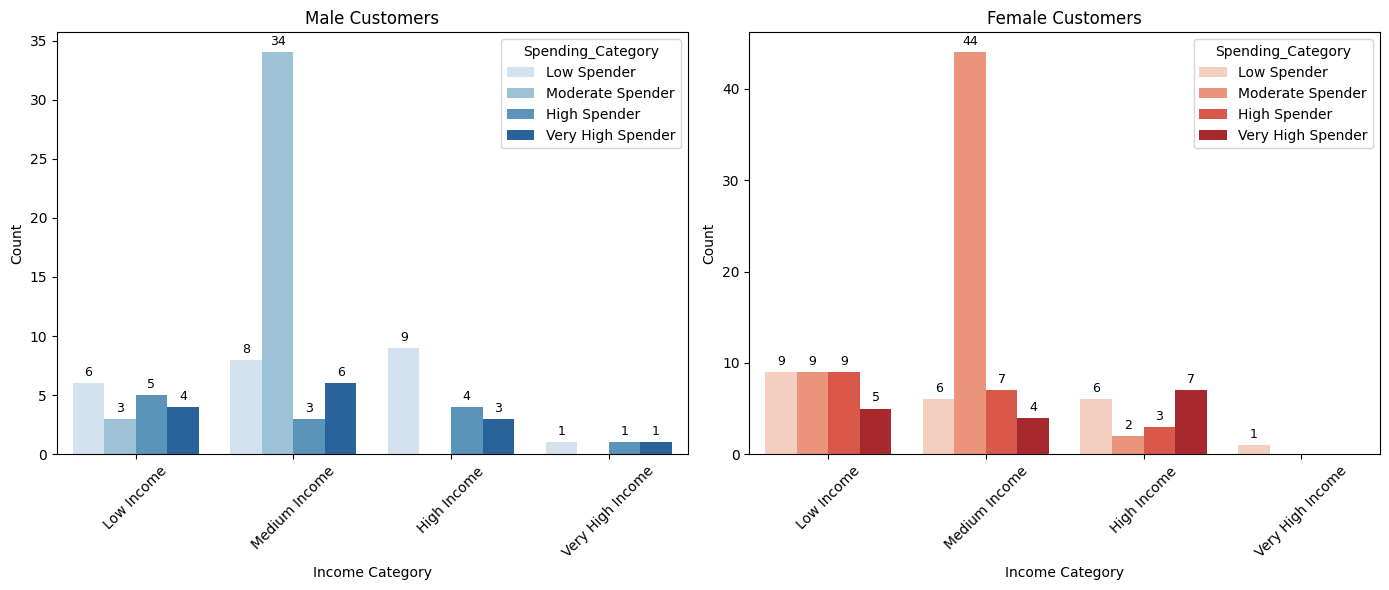

In [14]:
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax1 = sns.countplot(data=male_df, x='Income_Category', hue='Spending_Category', 
              ax=axes[0], palette='Blues')
axes[0].set_title('Male Customers')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('Income Category')
axes[0].set_ylabel('Count')
for container in ax1.containers:
    ax1.bar_label(container, fontsize=9, padding=3)
ax2 = sns.countplot(data=female_df, x='Income_Category', hue='Spending_Category', 
              ax=axes[1], palette='Reds')
axes[1].set_title('Female Customers')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('Income Category')
axes[1].set_ylabel('Count')
for container in ax2.containers:
    ax2.bar_label(container, fontsize=9, padding=3)
plt.tight_layout()
plt.savefig("C:\\UMAR DATA\\Data Sciences\\Intership\\Developer Hub\\Phase 2\\Task 5\\spending and Male Female.png", 
            dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

# Clustering And PCA

In [15]:
features = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
X = df[features]
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('cluster', KMeans(n_clusters=5, random_state=42, n_init=10))
])
pipeline.fit(X)
clusters = pipeline.named_steps['cluster'].labels_
df['Cluster'] = clusters
X_scaled = pipeline.named_steps['scaler'].transform(X)
X_pca = pipeline.named_steps['pca'].transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualize the clusters  

Cluster distribution:
Cluster
0    59
1    49
2    34
3    30
4    28
Name: count, dtype: int64


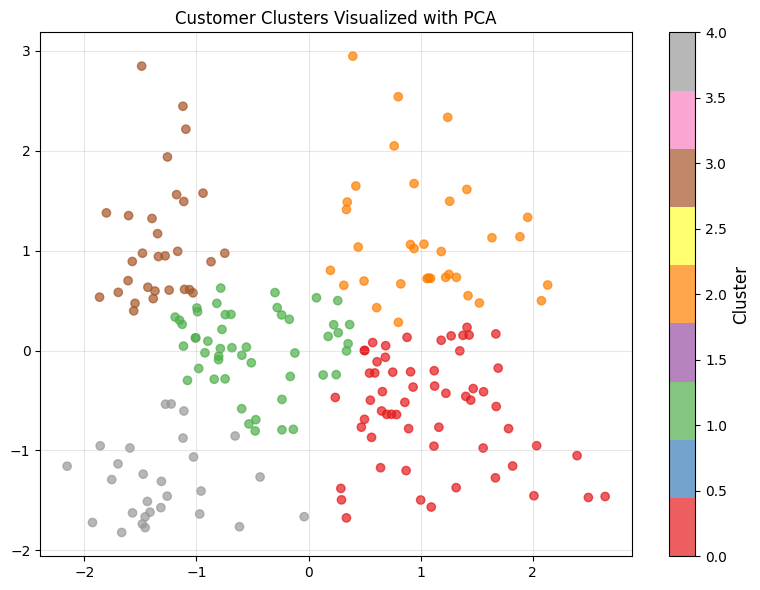

In [16]:
plt.figure(figsize=(8, 6))
scatter=plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='Set1', alpha=0.7)
print(f"Cluster distribution:\n{df['Cluster'].value_counts().sort_index()}")
cbar=plt.colorbar(scatter)
cbar.set_label('Cluster', fontsize=12)
plt.grid(True, alpha=0.3)
plt.title('Customer Clusters Visualized with PCA')
plt.tight_layout()
plt.savefig("C:\\UMAR DATA\\Data Sciences\\Intership\\Developer Hub\\Phase 2\\Task 5\\Customer Clusters Visualized with PCA.png", 
            dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')